# Problem Statement

As a part of this assignment, you will be performing the following tasks:

• Prepare a detailed python notebook using an Autoencoder to denoise images from MNIST Fashion Dataset with the best accuracy.

• Perform Data Visualization

• Prepare the dataset for the model (add some noise to the images)

• Build an Autoencoder model

• Train the model

• Evaluate trained model performance

• Display the Denoised Images

• Write-up a summary explaining how your program works

# Importing and Preparing the Dataset

In [6]:
#importing the libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print(tf.__version__)

2.4.1


We have imported the required libraries and loading mnist fashion data.

In [4]:
#import the data
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


The below function will help to visualize the images.

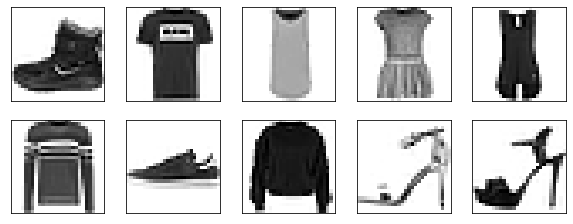

In [23]:
#Function for Data Visualization
def plot(x, num_imgs=5):
    plt.figure(figsize=(10,10))
    for i in range(num_imgs):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(x[i].reshape(28,28), cmap='binary')
plt.show()

plot(x_train, 10)

We will normalize all values between 0 and 1 and flatten the 28x28 images into vectors of size 784

In [7]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Adding Noise to the Data

We are preparing the dataset for our Model adding noise to the data.

In [8]:
x_train_noisy = x_train + np.random.rand(len(x_train), 784) * 0.9 
x_test_noisy = x_test + np.random.rand(len(x_test), 784) * 0.9

x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.) 

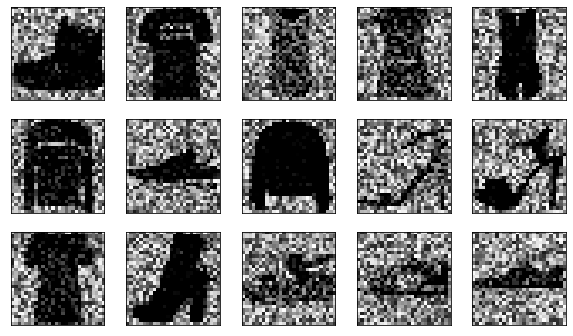

In [24]:
#plot the noisy data
#x_train_noisy_img = x_train_noisy.reshape(len(x_train_noisy), 28, 28)
plot(x_train_noisy,15)

# Building the Model

The input size is of a 1D array. Notice that Dense layer with 64 neurons produces the bottleneck. The final layer at the decoder end gives the output of 784 units. The sigmoid function gives out the value between 0 and 1. This layer decides whether to consider the noise pixel or not.

In [16]:
input_image = Input(shape=(784,))

encoded = Dense(512, activation='relu')(input_image)
encoded = Dense(512, activation='relu')(encoded)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)

decoded = Dense(512, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 512)               33280 

# Training the Model

In [18]:
history = autoencoder.fit(x_train_noisy, x_train, batch_size=128, epochs=50, shuffle=True, 
                          validation_data=(x_test_noisy, x_test))

Epoch 1/50
469/469 [==============================] - 4s 4ms/step - loss: 0.4135 - val_loss: 0.3251
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3184 - val_loss: 0.3124
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3085 - val_loss: 0.3076
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3038 - val_loss: 0.3036
Epoch 5/50
469/469 [==============================] - 2s 3ms/step - loss: 0.3000 - val_loss: 0.3011
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2964 - val_loss: 0.2972
Epoch 7/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2943 - val_loss: 0.2968
Epoch 8/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2931 - val_loss: 0.2948
Epoch 9/50
469/469 [==============================] - 1s 3ms/step - loss: 0.2905 - val_loss: 0.2935
Epoch 10/50
469/469 [==============================] - 2s 3ms/step - loss: 0.2891 - val_loss: 0.2921

# Evaluate the Model

Below you can see how well denoised images were produced from noisy ones present in x_test_noisy. There are three outputs: original test image, noisy test image, and denoised test image form autoencoders.

In [19]:
preds = autoencoder.predict(x_test_noisy)

Original Images:


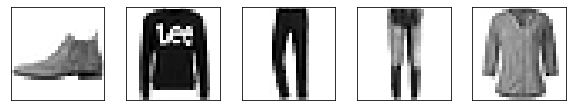

In [25]:
#visualizing the original, noised and denoised images
print("Original Images:")
plot(x_test)

Noisy Images:


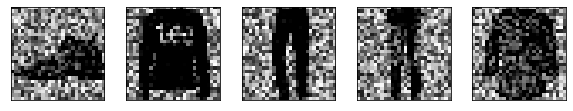

In [26]:
print("Noisy Images:")
plot(x_test_noisy)

Denoised Images:


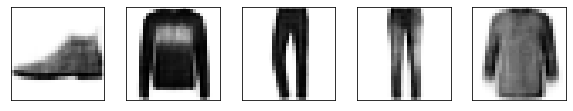

In [27]:
print("Denoised Images:")
plot(preds)

# Plot the loss

In [31]:
def plot_loss(history, x='loss', y='val_loss'):
    fig, ax = plt.subplots( figsize=(20,10)) 
    ax.plot(history.history[x]) 
    ax.plot(history.history[y]) 
    plt.title('Model Loss') 
    plt.ylabel(y) 
    plt.xlabel(x) 
    plt.legend(['Train', 'Val'], loc='upper left') 
    ax.grid(color='black') 
    plt.show() 

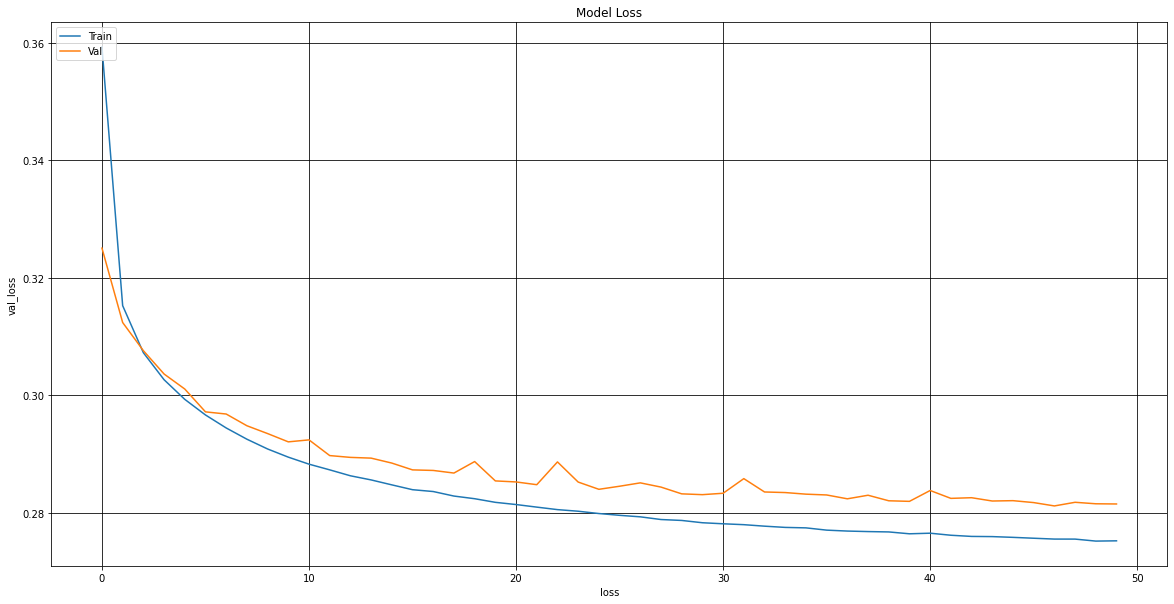

In [32]:
plot_loss(history)